In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from bioinfokit.analys import stat

In [64]:
df = pd.read_csv('../docs 2nd Approach/remove_outlier_chauvenet.csv')
df

,index,voltage,value
0,124,0.5v,0.000000
1,125,0.5v,0.000000
2,126,0.5v,0.000000
3,127,0.5v,0.000000
4,128,0.5v,0.000000
...,...,...,...
8061,8995,24.5v,0.285714
8062,8996,24.5v,0.285714
8063,8997,24.5v,0.285714
8064,8998,24.5v,0.285714


In [67]:
new = ols('value ~ voltage', data = df).fit()
an = sm.stats.anova_lm(new, typ=2)
an.to_csv('../docs 2nd Approach/ANOVA_chauvenet.csv')
an.to_excel('../docs 2nd Approach/ANOVA_chauvenet.xlsx')
an

,sum_sq,df,F,PR(>F)
voltage,157.663374,8.0,782.09694,0.0
Residual,203.026911,8057.0,NaN,NaN


In [68]:
res = stat()
res.tukey_hsd(df=df, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
df_tukey = res.tukey_summary
df_tukey

h:\Bagas\Code\Python\__env\ML-env\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,0.5v,3v,0.554791,0.525014,0.584568,81.749693,0.001000
1,0.5v,6v,0.018311,-0.008446,0.045068,3.002758,0.459845
2,0.5v,9v,0.015121,-0.011594,0.041836,2.483482,0.685048
3,0.5v,12v,0.002340,-0.024352,0.029033,0.384713,0.900000
4,0.5v,15v,0.012048,-0.014649,0.038745,1.980169,0.900000
5,0.5v,18v,0.098278,0.071599,0.124956,16.163399,0.001000
6,0.5v,21v,0.105952,0.079274,0.132631,17.425614,0.001000
7,0.5v,24.5v,0.071102,0.044424,0.097781,11.693901,0.001000
8,3v,6v,0.536479,0.510706,0.562252,91.332279,0.001000
9,3v,9v,0.539670,0.513940,0.565399,92.030629,0.001000


In [69]:
val = []
for i in df_tukey["p-value"]:
    if i > 0.05:
        val.append("True")
    else:
        val.append("False")
val = pd.DataFrame(val, columns=["H0"])
df_tukey = pd.concat([df_tukey, val], axis=1)
df_tukey.to_csv('../docs 2nd Approach/tukey_hsd.csv', index=False)
df_tukey.to_excel('../docs 2nd Approach/tukey_hsd.xlsx', index=False)
df_tukey

,group1,group2,Diff,Lower,Upper,q-value,p-value,H0
0,0.5v,3v,0.554791,0.525014,0.584568,81.749693,0.001000,False
1,0.5v,6v,0.018311,-0.008446,0.045068,3.002758,0.459845,True
2,0.5v,9v,0.015121,-0.011594,0.041836,2.483482,0.685048,True
3,0.5v,12v,0.002340,-0.024352,0.029033,0.384713,0.900000,True
4,0.5v,15v,0.012048,-0.014649,0.038745,1.980169,0.900000,True
5,0.5v,18v,0.098278,0.071599,0.124956,16.163399,0.001000,False
6,0.5v,21v,0.105952,0.079274,0.132631,17.425614,0.001000,False
7,0.5v,24.5v,0.071102,0.044424,0.097781,11.693901,0.001000,False
8,3v,6v,0.536479,0.510706,0.562252,91.332279,0.001000,False
9,3v,9v,0.539670,0.513940,0.565399,92.030629,0.001000,False


In [70]:
df_tukey = df_tukey[df_tukey['H0'] == "False"].reset_index(drop=True)
df_tukey.to_csv('../docs 2nd Approach/tukey_hsd_rejected.csv', index=False)
df_tukey.to_excel('../docs 2nd Approach/tukey_hsd_rejected.xlsx', index=False)

In [71]:
df_tukey = df_tukey[df_tukey['H0'] == "True"].reset_index(drop=True)
df_tukey.to_csv('../docs 2nd Approach/tukey_hsd_accepted.csv', index=False)
df_tukey.to_excel('../docs 2nd Approach/tukey_hsd_accepted.xlsx', index=False)

In [72]:
df_u = df.pivot(columns='voltage', values='value')
df_05v = df_u['0.5v'].dropna().reset_index(drop=True)
df_3v = df_u['3v'].dropna().reset_index(drop=True)
df_6v = df_u['6v'].dropna().reset_index(drop=True)
df_9v = df_u['9v'].dropna().reset_index(drop=True)
df_12v = df_u['12v'].dropna().reset_index(drop=True)
df_15v = df_u['15v'].dropna().reset_index(drop=True)
df_18v = df_u['18v'].dropna().reset_index(drop=True)
df_21v = df_u['21v'].dropna().reset_index(drop=True)
df_24_5v = df_u['24.5v'].dropna().reset_index(drop=True)

val = {
    "0.5v" : df_05v,
    "3v" : df_3v,
    "6v" : df_6v,
    "9v" : df_9v,
    "12v" : df_12v,
    "15v" : df_15v,
    "18v" : df_18v,
    "21v" : df_21v,
    "24.5v" : df_24_5v
}


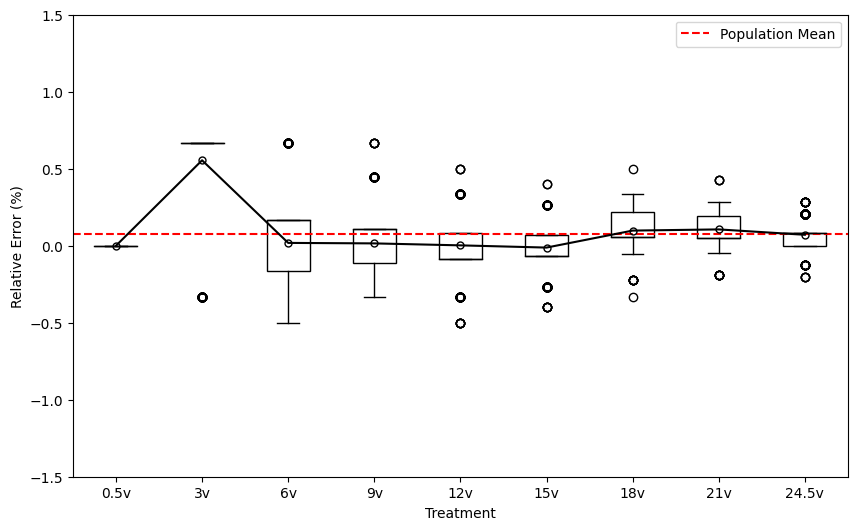

In [73]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)

mean = [None]
for i in val.keys():
    mean.append((val[i].mean()))

plt.boxplot(
    val.values(),  
    patch_artist=True, 
    boxprops=dict(facecolor="w", color="k"),
    medianprops=dict(color='k')
)
ax.axhline(df['value'].mean(), color='r', label='Population Mean', linestyle='--')
ax.plot(['','0.5v', '3v', '6v', '9v', '12v', '15v', '18v', '21v', '24.5v'], mean, marker='o',markerfacecolor='none', ms=5, markeredgecolor='k', color='k')
ax.set_xlabel('Treatment')
ax.set_ylabel('Relative Error (%)')
ax.set_ylim([-1.5, 1.5])
ax.set_xticklabels(val.keys())

plt.legend()
plt.savefig('../docs 2nd Approach/img/Boxplot mean data.png')

plt.show()